In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Data.csv')

In [ ]:
# Assuming 'x1', 'x2', 'x3', 'x4' are columns in your dataset and 'y' is the target variable
X = data[['x1', 'x2', 'x3', 'x4']].values
y = data['y'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize/Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Assuming it's a regression task with one output neuron
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 0.1780 - mae: 0.3557 - val_loss: 0.1289 - val_mae: 0.2958
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0911 - mae: 0.2504 - val_loss: 0.0846 - val_mae: 0.2409
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0695 - mae: 0.2204 - val_loss: 0.0705 - val_mae: 0.2189
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0591 - mae: 0.2011 - val_loss: 0.0589 - val_mae: 0.2030
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0510 - mae: 0.1882 - val_loss: 0.0500 - val_mae: 0.1857
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0458 - mae: 0.1783 - val_loss: 0.0437 - val_mae: 0.1753
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0416 - mae: 0.1704 - val_loss: 0.0389 - val_mae: 0.1654
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0378 - 

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)



5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - mae: 0.0768


In [ ]:
# Predict using the trained model
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
# After model evaluation

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test))
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = np.mean((predictions - y_test) ** 2)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared (R^2) score
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - predictions.flatten()) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f'R-squared (R^2) score: {r_squared}')

# Optionally, you can also display the model's evaluation output
print(f'Model evaluation - Loss: {loss}, MAE: {mae}')


Mean Absolute Error (MAE): 0.2604433452487665
Mean Squared Error (MSE): 0.10259263541359932
R-squared (R^2) score: 0.843270120196357
Model evaluation - Loss: 0.00914174597710371, MAE: 0.2604433452487665


      x1   x2   x3     x4     y
0  313.0  3.0  1.5  0.026  0.19
1  313.0  3.0  1.5  0.034  0.21
2  313.0  3.0  1.5  0.090  0.29
3  313.0  3.0  1.5  0.110  0.31
4  313.0  3.0  1.5  0.200  0.38


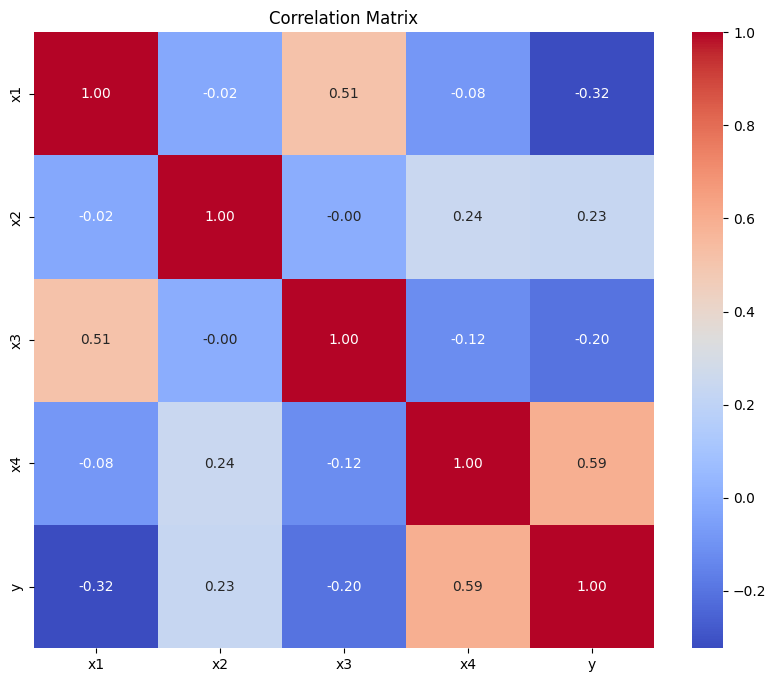

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Data.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
print(data.head())

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Statistical Representation of Data with Mean, Std Mean, Min, max , etc
descriptive_stats = data.describe()
print(descriptive_stats)


               x1          x2          x3           x4           y
count  691.000000  691.000000  691.000000   691.000000  691.000000
mean   320.055572    2.903234    0.684166   155.359344    0.630422
std     18.609021    0.901507    0.506604   326.945278    0.249675
min    293.000000    0.998429    0.000000     0.016000    0.035000
25%    308.000000    2.000000    0.230000     3.983500    0.440150
50%    313.200000    3.000000    0.580000    22.620000    0.642000
75%    328.000000    3.589859    1.000000    88.545000    0.837500
max    393.000000    4.487300    1.500000  1487.000000    1.072000


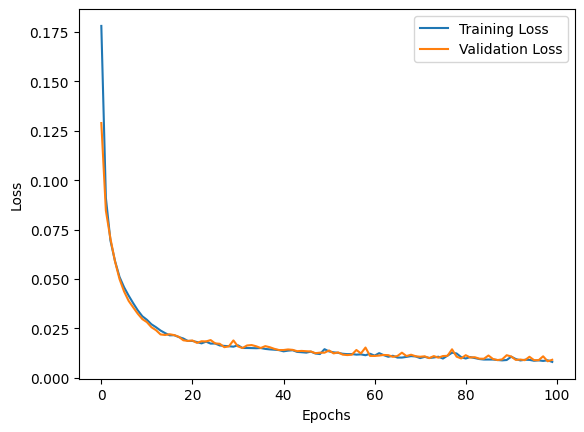

In [ ]:
#Plotting the training/validation loss and metrics over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()